## Import libs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [141]:
house_price= pd.read_csv('boston_house_prices.csv', header=1)
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [142]:
house_price.shape

(506, 14)

In [71]:
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Interpreting Data Description

1. There is no missing values
2. Variable 'ZN' is 0 for 25th and 50th percentile that will result in skweed data
3. Also for variable 'CHAS' it's 0 for 25th, 50th and 75th percentile that will also show us that data is highly skweed.

## Checking  outliers in the data

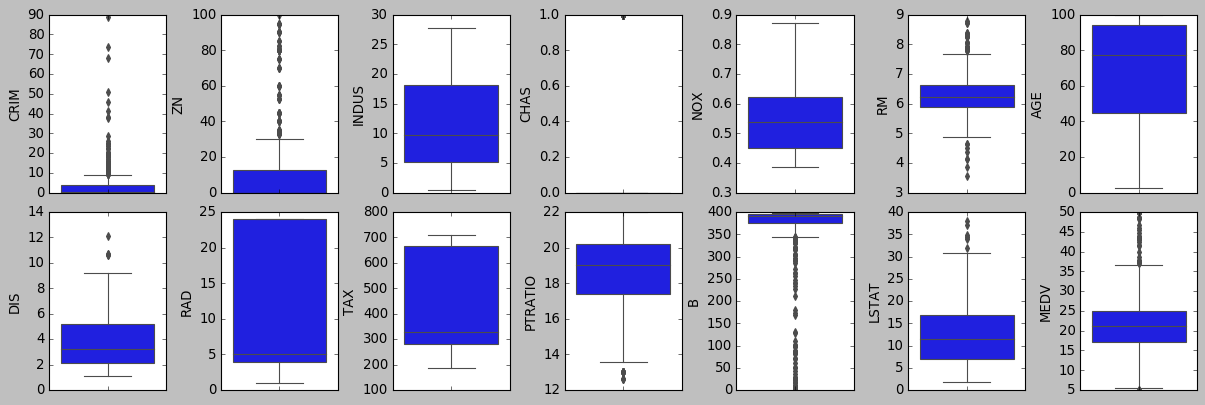

In [78]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in house_price.columns:
    sns.boxplot(y=i, data=house_price, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

Columns CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT and MEDV have outliers.

### Data Exploration

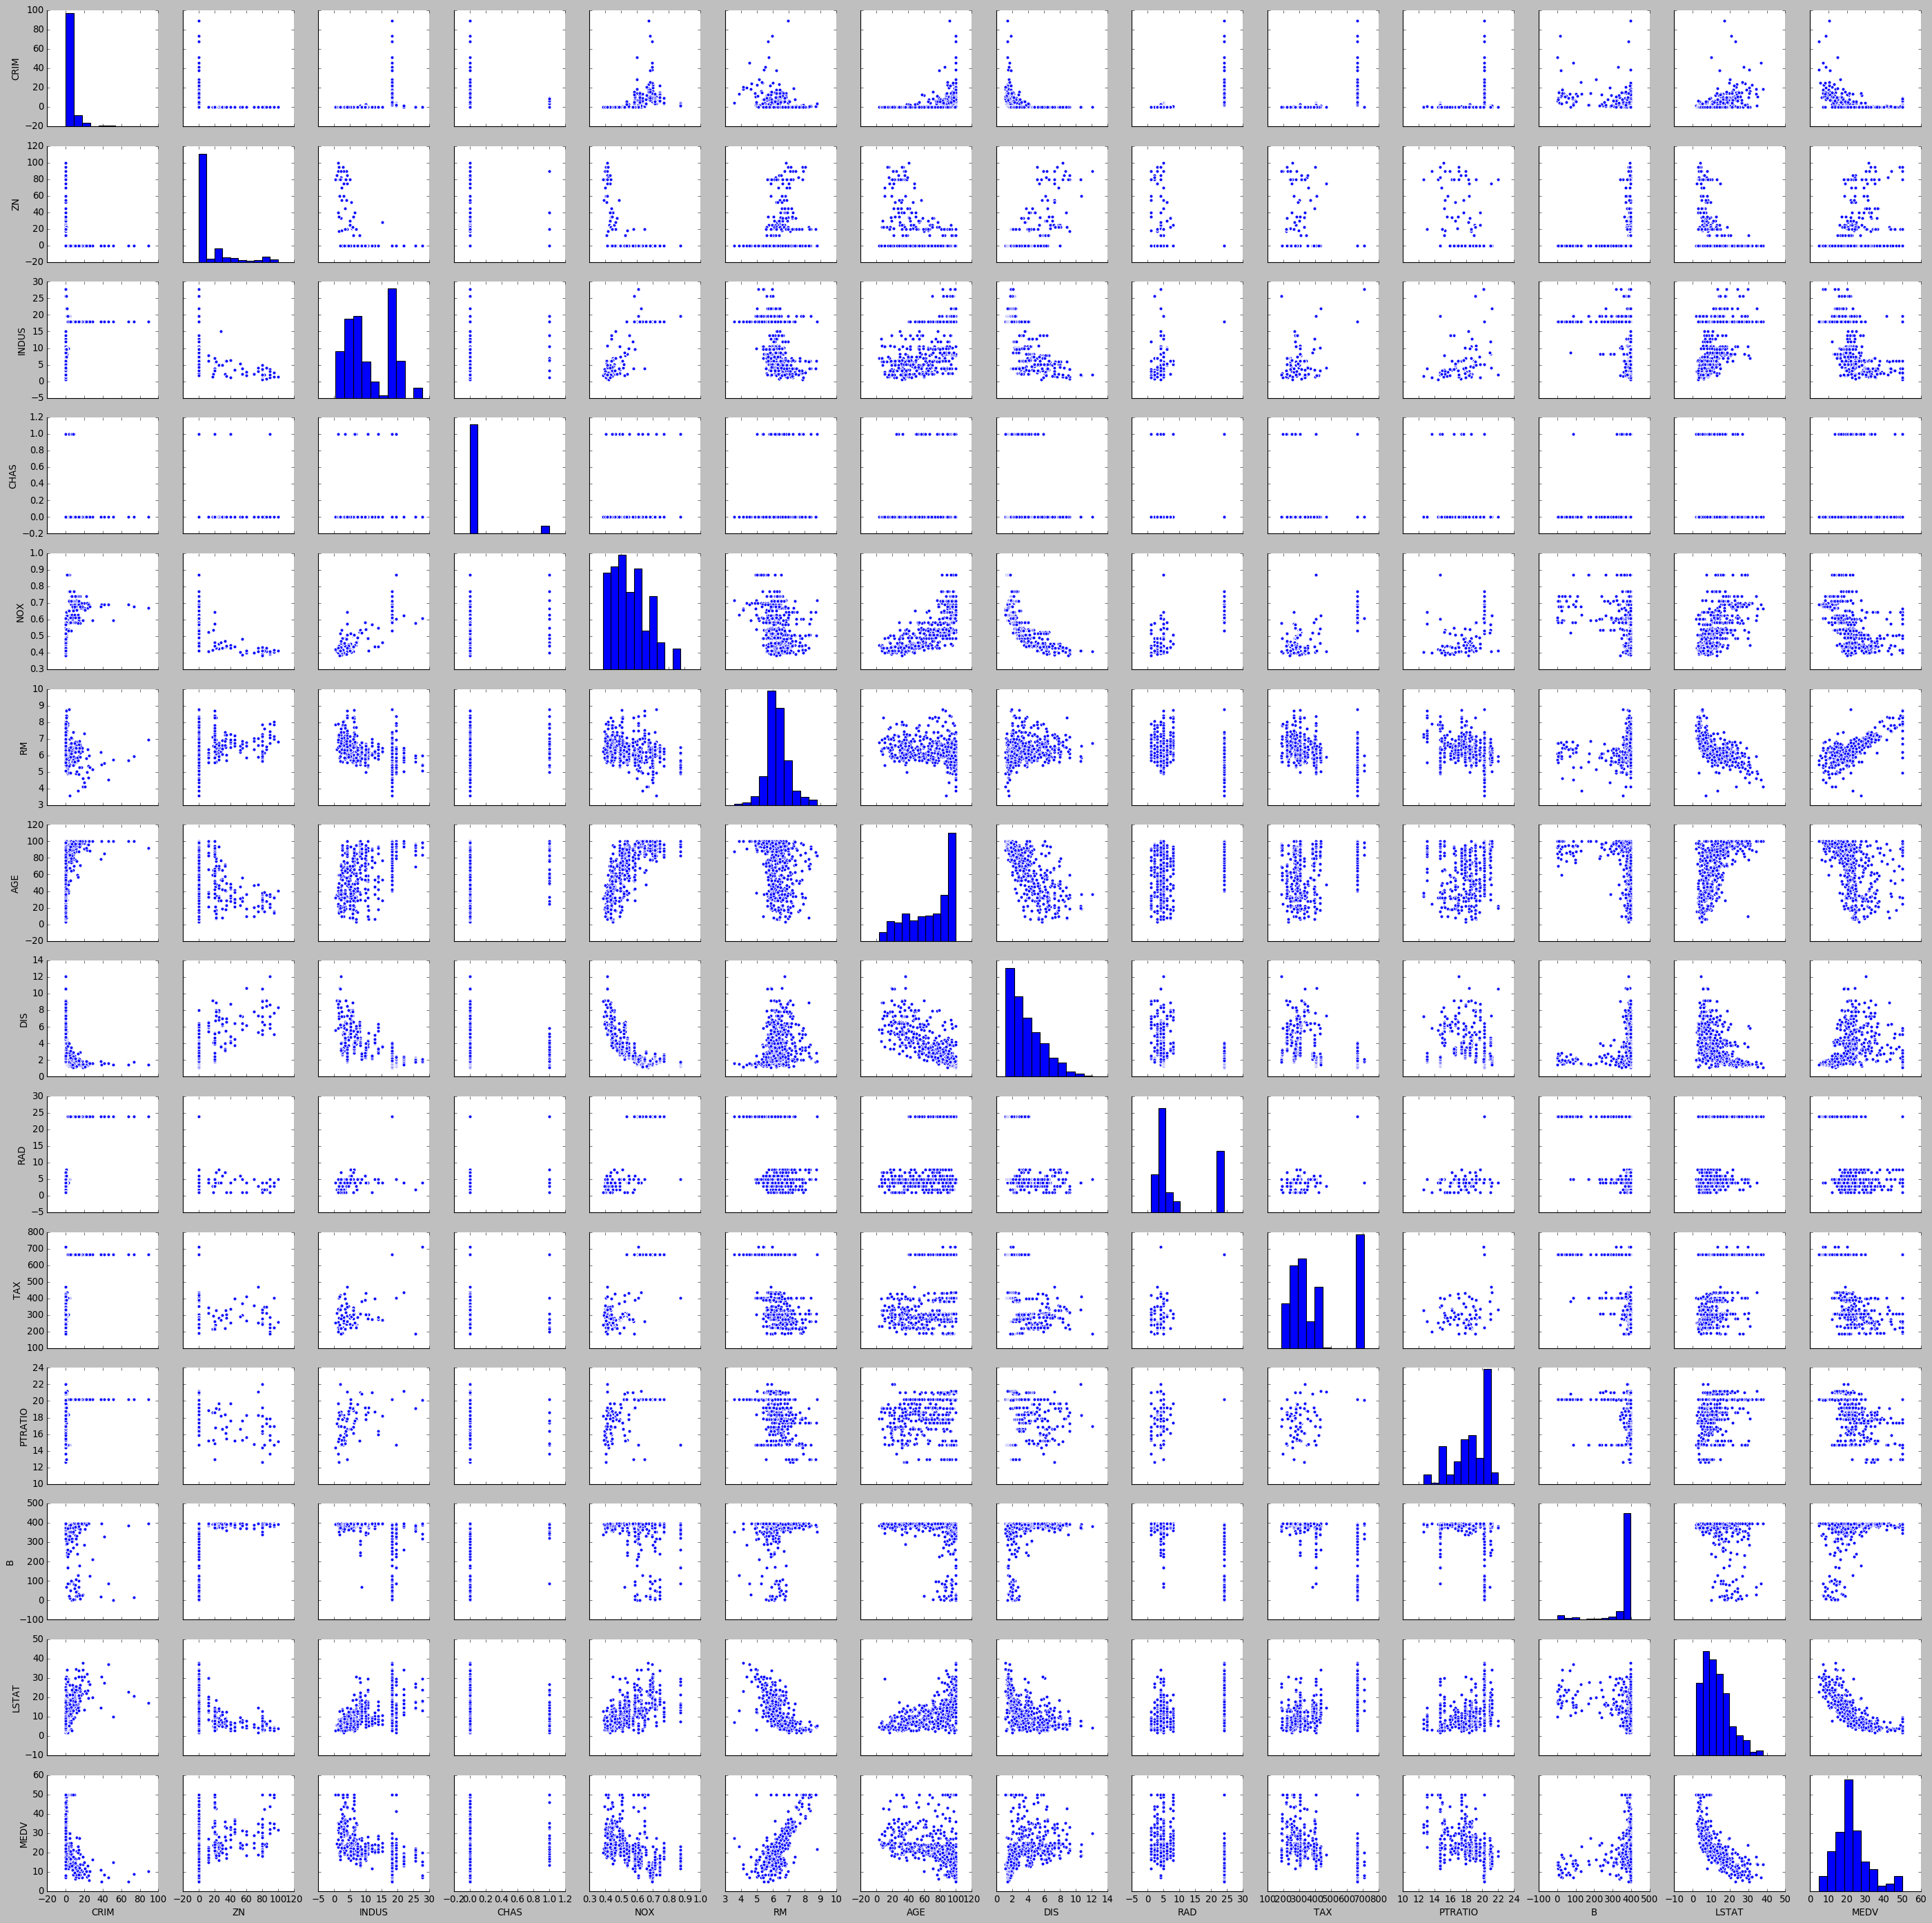

In [72]:
sns.pairplot(house_price)

1. we can infer from the histogram that the ‘MEDV’ variable seems to be normally distributed but contain several outliers.
2. We can spot a linear relationship between ‘RM’ and House prices ‘MEDV’

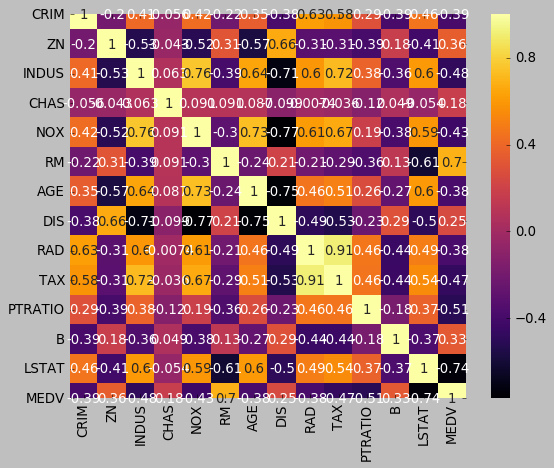

In [143]:
#Establishing correlation in data

from matplotlib import style
#creating a correlation matrix

style.use("classic")
sns.heatmap(house_price.corr(),annot=True,cmap='inferno')

To fit a regression model, the features of interest are the ones with a high correlation with the target variable ‘MEDV’

##  Preprocessing

In [144]:
x=house_price.drop("MEDV",axis=1)
y=house_price["MEDV"]
x.shape

(506, 13)

### feature scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x)



In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_std, y, test_size=0.2, random_state=1)


In [147]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(404, 13)
(102, 13)
(404,)


## Assessing feature importance with random forests

 1) MEDV                           0.519256
 2) AGE                            0.271913
 3) RAD                            0.060714
 4) ZN                             0.041922
 5) RM                             0.026131
 6) B                              0.019914
 7) DIS                            0.017419
 8) PTRATIO                        0.014688
 9) LSTAT                          0.012798
10) CHAS                           0.008401
11) TAX                            0.004558
12) INDUS                          0.001381
13) NOX                            0.000905


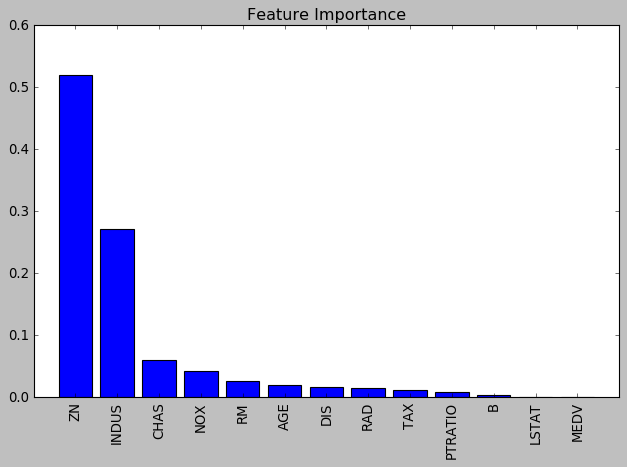

In [151]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
forest = RandomForestRegressor(n_estimators=500, random_state = 0)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
feat_labels = house_price.columns[1:]
indices = np.argsort(importances)[::-1]

# plot feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


In [89]:
#removing variables 'ZN' and 'CHAS' form data
house_price = house_price.drop(['CHAS', 'CHAS', 'TAX', 'INDUS', 'NOX'], axis=1)

In [98]:
house_price.head()

,CRIM,ZN,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


## Train a model

## LinearRegression

In [116]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [117]:
pred_y = lm.predict(X_test)
Y_compare_linear= pd.DataFrame({"Actual": y_test, "Predict": pred_y})
Y_compare_linear.head()

,Actual,Predict
307,28.2,32.655032
343,23.9,28.093495
47,16.6,18.029018
67,22.0,21.476716
362,20.8,18.825439


In [118]:
print(r2_score(y_test,pred_y))
print(mean_absolute_error(y_test,pred_y))
print(mean_squared_error(y_test,pred_y))

0.7634174432138471
3.7507121808389186
23.380836480270236


## XGBRegressor

In [28]:
!pip install xgboost

In [130]:
from xgboost import XGBClassifier,XGBRFRegressor,XGBRegressor
xgb=XGBRegressor(n_estimators=1000)
xgb.fit(X_train,y_train)
kfold=KFold(n_splits=5)
res=cross_val_score(model,X_train,y_train,cv=kfold)

In [131]:
yp=xgb.predict(X_test)
Y_compare_XGBReg= pd.DataFrame({"Actual": y_test, "Predict": yp})
Y_compare_XGBReg.head()

,Actual,Predict
307,28.2,30.355581
343,23.9,27.036160
47,16.6,19.179735
67,22.0,21.445940
362,20.8,20.704473


In [132]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(r2_score(y_test,yp))
print(mean_absolute_error(y_test,yp))
print(mean_squared_error(y_test,yp))


0.9085636534834294
2.3446863277285703
9.036415428503787


## K-Nearest Neighbour

In [121]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_knn.head()


,Actual,Predicted
307,28.2,28.700000
343,23.9,26.407692
47,16.6,21.076923
67,22.0,22.707692
362,20.8,21.192308


In [122]:
print(r2_score(y_test,Y_pred))
print(mean_absolute_error(y_test,Y_pred))
print(mean_squared_error(y_test,Y_pred))

0.7717524581466177
3.23288084464555
22.55710871330781


## Random Forrest Regression

In [119]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
307,28.2,30.606
343,23.9,27.073
47,16.6,20.342
67,22.0,20.577
362,20.8,19.605


In [120]:
print(r2_score(y_test,Y_pred))
print(mean_absolute_error(y_test,Y_pred))
print(mean_squared_error(y_test,Y_pred))

0.9116841276994161
2.326950980392157
8.728027107843138


## Evaluation 

Plotting compariasion of actual and predicted values of MEDV that we got using different machine learning models

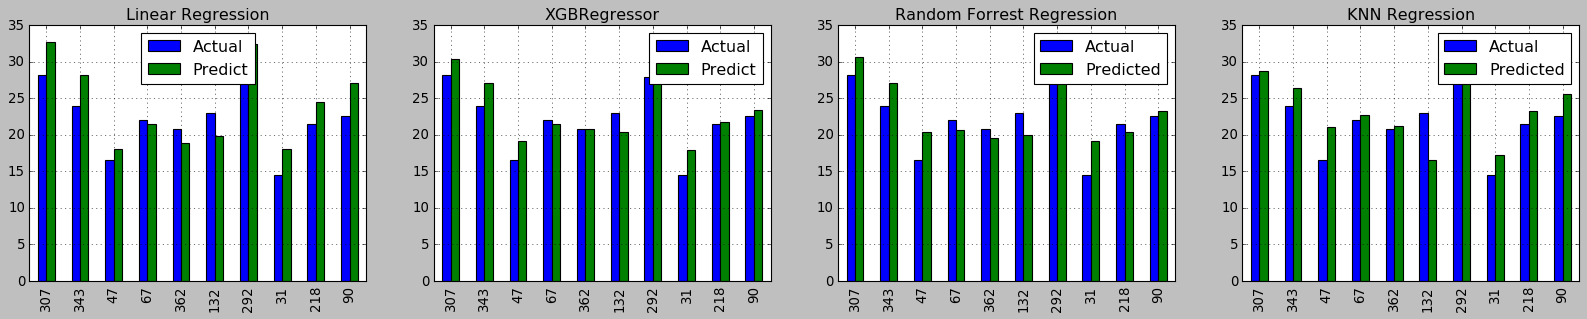

In [127]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_XGBReg.head(10).plot(kind='bar', title='XGBRegressor', grid=True, ax=ax[1])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[2])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[3])
plt.show()

Scores (R squared) of different machine learning models using K-fold cross validation:

In [136]:
from sklearn.model_selection import cross_val_score as cvs
print('According to R squared scorring method we got below scores for out machine learning models:')
modelNames = ['Linear Regression', 'XGBRegressor', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [lm, xgb, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
    accuracy = cvs(i, X_train, y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
    counter+=1

According to R squared scorring method we got below scores for out machine learning models:
Accuracy of Linear Regression Regression model is 0.70
Accuracy of XGBRegressor Regression model is 0.83
Accuracy of Random Forrest Regression model is 0.87
Accuracy of K-Nearest Neighbour Regression model is 0.70


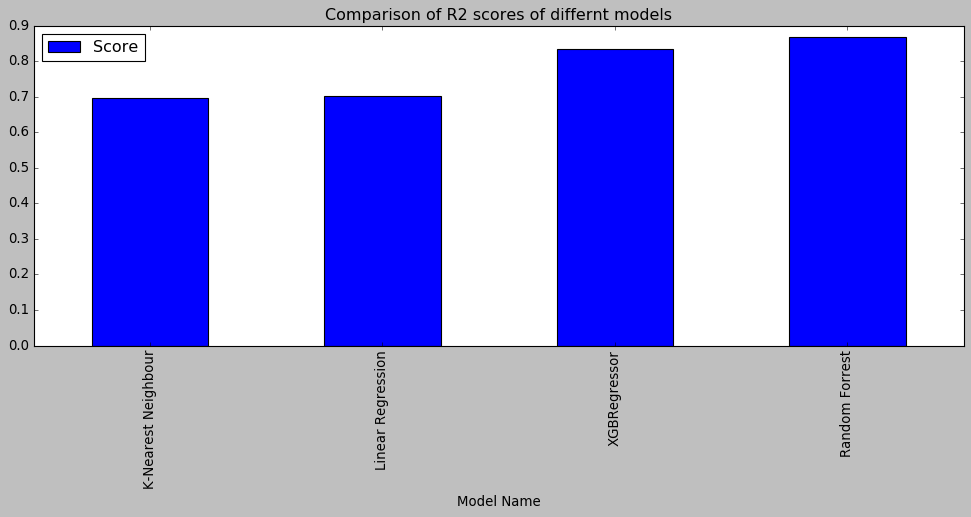

In [137]:
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparison of R2 scores of differnt models', )
plt.show()

we can summarise that Random Forrest (r2 =  0.87) machine learning model gives the best score